## <center> Задание №1 </center> ##
### <center> Выполнил: Алексей Демин </center> ###

Текст задания - Руководство компании обратило внимание на то, что сотрудники старше 35 лет болеют чаще, чем более молодые сотрудники. Кроме этого, среди мужчин количество пропусков рабочих дней в связи с больничным выше, чем среди женщин. В связи с этой ситуацией, руководство организации планирует ввести дополнительные медицинские осмотры среди групп риска. 

Необходимо обосновать, что:

1)	Мужчины пропускают в течение года более 2 рабочих дней по болезни значимо чаще женщин.

2)	Работники старше 35 лет пропускают в течение года более 2 рабочих дней по болезни значимо чаще своих более молодых коллег.

Все необходимые данные содержатся в файле «Статистика за 2016 год».


#### Импортируем необходимые библиотеки для работы

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from scipy.stats import chi2_contingency

warnings.filterwarnings("ignore")
%matplotlib inline

#### Читаем данные из файла и сразу делаем предосмотр

In [2]:
data = pd.read_csv('stats.csv', encoding = "cp1251")    # Вводим дополнительный параметр "encoding", 
                                                        # чтобы правильно прочесть кириллицу
data.head()

,Количество больничных дней,Возраст,Пол
0,5,39,Ж
1,4,54,М
2,4,26,М
3,5,42,М
4,4,29,М


#### Для удобства работы добавим два бинарных признака в данные

In [3]:
#Ставим 1 в признаке "Старший", если сотрудник старше 35 лет, иначе 0.
#Далее для удобства в зависимости от возраста сотрудники будут обозначены как "старшие" и "младшие"
data['Старший'] = data['Возраст'].apply(lambda x: 1 if x > 35 else 0)

#Ставим 1 в признаке "Болеющий", если сотрудник пропустил работу более 2-ух раз, иначе 0
#Далее для удобства в зависимости от пропусков сотрудники будут обозначены как "болеющие" и "здоровые"
data['Болеющий'] = data['Количество больничных дней'].apply(lambda x: 1 if x > 2 else 0) 
data.head()

,Количество больничных дней,Возраст,Пол,Старший,Болеющий
0,5,39,Ж,1,1
1,4,54,М,1,1
2,4,26,М,0,1
3,5,42,М,1,1
4,4,29,М,0,1


#### Смотрим на основные параметры датасета

In [4]:
data.describe()

,Количество больничных дней,Возраст,Старший,Болеющий
count,237.000000,237.000000,237.000000,237.000000
mean,3.257384,40.181435,0.759494,0.637131
std,1.807821,6.875157,0.428295,0.481845
min,0.000000,23.000000,0.000000,0.000000
25%,2.000000,36.000000,1.000000,0.000000
50%,3.000000,41.000000,1.000000,1.000000
75%,4.000000,45.000000,1.000000,1.000000
max,8.000000,60.000000,1.000000,1.000000


#### Проверяем есть ли пропуски в данных

In [5]:
data.isnull().sum() #Считаем общее кол-во пропусков по признакам

Количество больничных дней    0
Возраст                       0
Пол                           0
Старший                       0
Болеющий                      0
dtype: int64

#### Предварительный количественный анализ по признакам

In [6]:
print('Соотношение полов в компании:', data["Пол"].value_counts(), sep='\n')
print('Соотношение по возрасту в компании (старше 35 лет):', data["Старший"].value_counts(), sep='\n')

Соотношение полов в компании:
М    139
Ж     98
Name: Пол, dtype: int64
Соотношение по возрасту в компании (старше 35 лет):
1    180
0     57
Name: Старший, dtype: int64


In [7]:
#Используем фильтр для получения нужных значений
data_M = data[(data['Пол'] == 'М')]
data_F = data[(data['Пол'] == 'Ж')]
print('Соотошение мужчин по пропускам:', data_M['Болеющий'].value_counts(), sep='\n')
print('Соотошение женщин по пропускам:', data_F['Болеющий'].value_counts(), sep='\n')

Соотошение мужчин по пропускам:
1    84
0    55
Name: Болеющий, dtype: int64
Соотошение женщин по пропускам:
1    67
0    31
Name: Болеющий, dtype: int64


In [8]:
#Используем фильтр для получения нужных значений
data_O = data[(data['Старший'] == 1)]
data_Y = data[(data['Старший'] == 0)]
print('Соотошение сотрудников старших 35 по пропускам:', data_O['Болеющий'].value_counts(), sep='\n')
print('Соотошение сотрудников младше 35 по пропускам:', data_Y['Болеющий'].value_counts(), sep='\n')

Соотошение сотрудников старших 35 по пропускам:
1    115
0     65
Name: Болеющий, dtype: int64
Соотошение сотрудников младше 35 по пропускам:
1    36
0    21
Name: Болеющий, dtype: int64


In [9]:
print('Процент пропускающих мужщин:', data_M['Болеющий'].value_counts().values[1] 
      / data_M['Болеющий'].value_counts().values[0] * 100)
print('Процент пропускающих женщин:', data_F['Болеющий'].value_counts().values[1] 
      / data_F['Болеющий'].value_counts().values[0] * 100)

Процент пропускающих мужщин: 65.47619047619048
Процент пропускающих женщин: 46.26865671641791


In [10]:
print('Процент пропускающих старших:', data_O['Болеющий'].value_counts().values[1] 
      / data_O['Болеющий'].value_counts().values[0] * 100)
print('Процент пропускающих младших:', data_Y['Болеющий'].value_counts().values[1] 
      / data_Y['Болеющий'].value_counts().values[0] * 100)

Процент пропускающих старших: 56.52173913043478
Процент пропускающих младших: 58.333333333333336


#### Выводы по количественному анализу:
По полученным числам можно сказать, что мужчины больше пропускают работу по болезни чем женщины (84 к 67). Аналогично с возрастом - старшие сотрудники пропускают работу больше (115 к 36).

Однако так же есть и сильный дисбаланс по классам - мужчин больше чем женщин (84 к 55), и работников старше 35 гораздо больше, чем молодых сотрудников (180 к 57).

Различие по процентному соотношению для болеющих мужчин и женщин не особо велико. Для проверки значимости этого результата необходимо будет провести статистический тест.

Различие по процентному соотношению для возрастных групп склоняется к младшим сотрудникам - молодых болеет больше. Уже на этом этапе вполне можно утверждать, что вторую гипотезу принять нельзя. Однако далее я все равно проведу аналогичный тест и для этого пункта задания.

#### Предварительный визуальный анализ данных

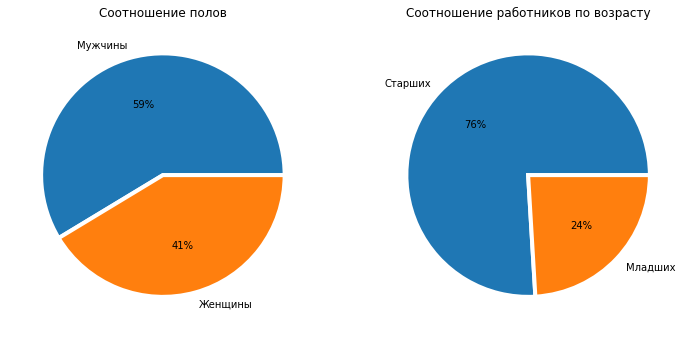

In [11]:
# Далее можно визуализировать данные, полученные в предыдущих пунктах
#
# Строим две круговые диаграммы, которые покажут соотношение полов в компании, а также соотношение между теми кто
# пропускает работу более 2-ух раз и менее 2-ух раз.

plt.figure(figsize=(12,6))

plt.subplot(121) # строим круговую диаграмму слева
plt.pie(data["Пол"].value_counts(), 
        labels=["Мужчины","Женщины"],
        autopct="%1.0f%%",wedgeprops={"linewidth":4,"edgecolor":"white"})
plt.title("Соотношение полов")


plt.subplot(122) # строим круговую диаграмму справа
plt.pie(data["Старший"].value_counts(),
        labels=["Старших","Младших"],
        autopct="%1.0f%%",wedgeprops={"linewidth":4,"edgecolor":"white"})
plt.title("Соотношение работников по возрасту")
plt.show()

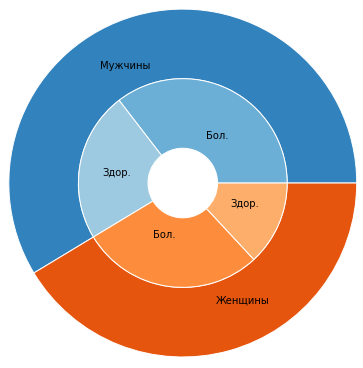

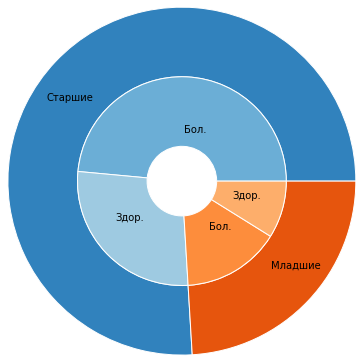

In [12]:
# Строим вложенные круговые диаграммы аналогичные предыдущей ячейке,
# но в этот раз обозначим болеющих сотрудников в соответствующей категории

# Вложенная диаграмма для соотношения по полу
fig, ax = plt.subplots()

# Настройка цветовой палитры
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))

# Размер диаграммы
size = 0.8
# Используем ранее полученные значения
vals = np.array([data_M['Болеющий'].value_counts().values, data_F['Болеющий'].value_counts().values])

ax.pie(vals.sum(axis=1), labels=["Мужчины","Женщины"], radius=2, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'), labeldistance=0.7)

ax.pie(vals.flatten(), labels=["Бол.","Здор.", "Бол.","Здор."],
       radius=2-size, colors=inner_colors, wedgeprops=dict(width=size, edgecolor='w'), labeldistance=0.5)
plt.show()


# Вложенная диаграмма для соотношения по возрасту
fig, ax = plt.subplots()

# Размер диаграммы
size = 0.8
# Используем ранее полученные значения
vals = np.array([data_O['Болеющий'].value_counts().values, data_Y['Болеющий'].value_counts().values])

ax.pie(vals.sum(axis=1), labels=["Старшие","Младшие"], radius=2, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'), labeldistance=0.7)

ax.pie(vals.flatten(), labels=["Бол.","Здор.", "Бол.","Здор."],
       radius=2-size, colors=inner_colors, wedgeprops=dict(width=size, edgecolor='w'), labeldistance=0.5)
plt.show()



#### Проверка статистических гипотез

Статистическая гипотеза – утверждение относительно неизвестного параметра генеральной совокупности на основе выборочного исследования.

Проведем исследование направленое на выявление связи между признаками. В данном случае необходимо узнать, влияет ли пол и возраст на количество пропущенных дней.

В данном исследований лучше всего подойдет критерий ${\chi}^2$ Пирсона. Хи-квадрат Пирсона это один из самых популярных статистических критериев для анализа качественных данных и анализа частот. Метод позволяет оценить статистическую значимость различий двух или нескольких относительных показателей (частот, долей).

Проведем анализ для первого пункта и определим влияние пола на кол-во пропусков.

Введем нулевую гипотезу $H_{0}$ - Мужчины пропускают работу по болезни (более 2-ух пропусков) НЕ чаще женщин.
Тогда альтернативная гипотеза $H_{A}$ - Мужчины пропускают работу по болезни (более 2-ух пропусков) чаще женщин.

Критерий хи-квадрат применяется при анализе таблиц сопряженности, содержащих сведения о частоте исходов в зависимости от наличия фактора риска. Построим таблицу сопряженности используя ранее полученные данные:

|      -   | Болеющих | Здоровых | Всего |
|---------|----------|----------|-------|
| Пол (М) |       84 |       55 |   139 |
| Пол (Ж) |       67 |       31 |    98 |
| Всего   |      151 |       86 |   237 |

В таблице выше указаны <b>наблюдаемые</b> значения. Для получения ${\chi}^2$ сначала необходимо написать таблицу с <b>ожидаемыми</b> значениями. Данная таблица, как и ${\chi}^2$ рассчитываются по не сложной формуле. Однако еще проще использовать модуль stats из scipy с функцией chi2_contingency, которая по наблюдаемым значениям сразу посчитает и таблицу с наблюдаемыми значениям, и само значение  ${\chi}^2$

In [13]:
obs = np.array([[84, 55], [67, 31]]) # наши наблюдаемые значения в виде массива
chi2_contingency(obs, correction=False) # функция возвращающая нужные нам значения. Т.к. далее в таблице ожидаемых значений
                                        # меньше 10 нет, отключаем коррекцию Йетса таблиц сопряженности

(1.5656095414907927, 0.21084576203875743, 1, array([[88.56118143, 50.43881857],
        [62.43881857, 35.56118143]]))

Получаем:

${\chi}^2$ = 1.5656

_p-значение_ = 0.2108

_число степеней свободы_ = 1

Для числа степеней свободы 1, и ${\alpha}$ = 0.05: Критическое значение ${\chi}^2$ = 3.841

Полученное эмпирическое значение критерия ${\chi}^2$ оказалось гораздо меньше критического (1.5656 < 3.841), это значит, что нулевая гипотеза не может быть отклонена. Cледовательно зависимость частоты пропусков от пола - статистически НЕ значима.

#### Мужчины пропускают работу по болезни (более 2-ух пропусков) НЕ чаще женщин.

Аналогично, полученное _p-значение_ гораздо больше уровня значимости (0.21 > 0.05) - нулевая гипотеза не может быть отклонена.


Точно таким же способом проведем анализ второго пункта.

Введем нулевую гипотезу $H_{0}$ - Старшие сотрудники пропускают работу по болезни (более 2-ух пропусков) НЕ чаще молодых.
Тогда альтернативная гипотеза $H_{A}$ - Старшие сотрудники пропускают работу по болезни (более 2-ух пропусков) чаще молодых.

|      -   | Болеющих | Здоровых | Всего |
|---------|----------|----------|-------|
| Возраст > 35 |       115 |       65 |   180 |
| Возраст < 35 |       36 |       21 |    57 |
| Всего   |      151 |       86 |   237 |

In [14]:
obs = np.array([[115, 65], [36, 21]])
chi2_contingency(obs, correction=False)

(0.010005714656269607,
 0.9203216442446261,
 1,
 array([[114.6835443,  65.3164557],
        [ 36.3164557,  20.6835443]]))

Получаем:

${\chi}^2$ = 0.01

_p-значение_ = 0.92

_число степеней свободы_ = 1

Для числа степеней свободы 1, и ${\alpha}$ = 0.05: Критическое значение ${\chi}^2$ = 3.841

Полученное эмпирическое значение критерия ${\chi}^2$ оказалось гораздо меньше критического (0.01 < 3.841), это значит, что нулевая гипотеза не может быть отклонена. Cледовательно зависимость частоты пропусков от возраста - статистически НЕ значима.

#### Старшие сотрудники пропускают работу по болезни (более 2-ух пропусков) НЕ чаще молодых.

Аналогично, полученное _p-значение_ гораздо больше уровня значимости (0.92 > 0.05) - нулевая гипотеза не может быть отклонена.

#### Таким образом, нельзя обосновать, что возраст и пол значимо влияют на частоту пропусков работы. Ни одну из гипотез условия задачи принять нельзя ($H_{0}$ гипотезы не отклонены).